Libraries required: gym, numpy, matplotlib, random

In [ ]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import random
#import time

In [ ]:
grid = np.zeros((4, 4)) #this is how you define a 3x3 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[0.8 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.6]]


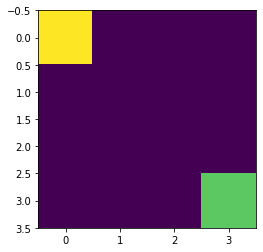

In [ ]:
#@title 默认标题文本
pos1 = [0, 0] #start position of our agent
pos2 = [3, 3] #goal position of our agent
grid[tuple(pos1)] = 0.8
grid[tuple(pos2)] = 0.6

print(grid)
plt.imshow(grid)

In [ ]:
class GridEnvironment(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16) # total space
        self.action_space = spaces.Discrete(4) # 4 possible actions
        self.max_timesteps = 20 # what is it? 
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        # set up the reward position
        self.reward1 = [0,2] 
        self.reward2 = [2,1]
        self.reward3 = [2,3]
        self.reward4 = [3,0]
        
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1 # color change
        self.state[tuple(self.goal_pos)] = 0.5 # set up for sate[3,3] = 0.5
        observation = self.state.flatten() # return states as single array 
        return observation
    
    def step(self, action):
        # four actions, no need to change
        
        actions = ""

        if action ==0: #down
            self.agent_pos[0] +=1  #[0,1]->[1,1]
            actions = "down"
        if action ==1: #up
            self.agent_pos[0] -=1  #[1,1]->[0,1]
            actions = "up"
        if action ==2: #right
            self.agent_pos[1] +=1
            actions = "right"
        if action ==3: #left
            self.agent_pos[1] -=1
            actions = "left"    
        # set up addional update
        
        self.agent_pos = np.clip(self.agent_pos, 0, 3)  # set max move space
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20
        elif (self.agent_pos == self.reward1).all():
            reward = -7
        elif (self.agent_pos == self.reward2).all():
            reward = -8
        elif (self.agent_pos == self.reward3).all():
            reward = 10
        elif (self.agent_pos == self.reward4).all():
            reward = 9
        
        # update the timestep
        self.timestep += 1
        done = True if self.timestep>= self.max_timesteps else False
        info = {}
        
        return observation, actions, reward, done, info
    
    
    def render(self):
        plt.imshow(self.state)

In [ ]:
def choose_action(epsilon: float, env: GridEnvironment, q_table, current_obs: int):
    action = 0
  # case 1: choose exploration
  # choose random action
    if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(env.action_space.n)
    
    else:
            current_state = obseration_to_state(current_obs)
            action = np.argmax(q_table[current_state])
    
    return action

In [ ]:
def obseration_to_state(obs):
    # we use 1 to repsent current states
    # and 0.5 is our goal, but they will collapose
    n = 0
    for i in obs:
        if i == 1 or i == 0.5:
            return n
        n += 1

In [ ]:
# import time
def SARSA(step_size: int, epsilon_greedy: float):
    # initialize Q(s, a)
    s_table = np.zeros((16, 4))
    env = GridEnvironment()

    # set up the number of episodes
    num_episcodes = 100
    epsilon = epsilon_greedy
    alpha = step_size
    gamma = 0.9
    total_reward = 0

    # plot
    s_y_eips = []
    s_y_time_steps = []

    goal_state = "[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]"
    for episode in range(num_episcodes):
        cur_obs = env.reset()
        # total_reward = 0
        # getting next action
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(env.action_space.n)
    
        else:
            current_state = obseration_to_state(cur_obs)
            action = np.argmax(q_table[current_state])
            
        while (1):
            
            next_obs, actions, reward, done, info = env.step(action)
            total_reward += reward
            if episode == 0:
                s_y_time_steps.append(reward)

            if done: 
                print(f'done, and our total reward would be {total_reward}\n')
                s_y_eips.append(total_reward)
                break  
            # getting next action
            if np.random.uniform(0, 1) < epsilon:
                next_action = np.random.choice(env.action_space.n)

            else:
                current_state = obseration_to_state(next_obs)
                next_action = np.argmax(s_table[current_state])

            # convert observation to state
            previous_state = obseration_to_state(cur_obs)
            next_state = obseration_to_state(next_obs)
            # update q_table value
            current_s = s_table[previous_state, action]
            after = reward + gamma * s_table[next_state, next_action]
            s_table[previous_state, action] = current_s + alpha * (after - current_s)
            # update state for next iteration
            cur_obs = next_obs
            action = next_action


         
    return s_table, s_y_eips, s_y_time_steps




done, and our total reward would be 144

done, and our total reward would be 306

done, and our total reward would be 468

done, and our total reward would be 630

done, and our total reward would be 792

done, and our total reward would be 954

done, and our total reward would be 1116

done, and our total reward would be 1269

done, and our total reward would be 1431

done, and our total reward would be 1566

done, and our total reward would be 1728

done, and our total reward would be 1890

done, and our total reward would be 2007

done, and our total reward would be 2169

done, and our total reward would be 2322

done, and our total reward would be 2484

done, and our total reward would be 2637

done, and our total reward would be 2790

done, and our total reward would be 2943

done, and our total reward would be 3096

done, and our total reward would be 3249

done, and our total reward would be 3402

done, and our total reward would be 3528

done, and our total reward would be 3646

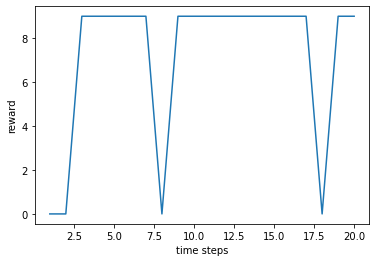

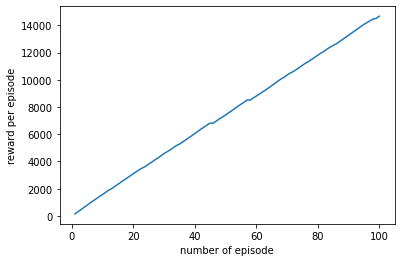

In [ ]:
s_table, y_s, y_s_time = SARSA(0.1, 0.1)
print(s_table)
import matplotlib.pyplot as plt
# print(x)
# print("====")
# print(y)
x_s1 = [i for i in range(1, len(y_s_time) + 1)]
plt.plot(x_s1, y_s_time)
plt.xlabel('time steps')
plt.ylabel('reward')
plt.show()

x_s2 = [i for i in range(1, len(y_s) + 1)]
plt.plot(x_s2, y_s)
plt.xlabel('number of episode')
plt.ylabel('reward per episode')
plt.show()

In [ ]:
from numpy.random.mtrand import f
def Q_learning(step_size, epsilon_greedy):
    # initialize Q(s, a)
    q_table = np.zeros((16, 4))
    env = GridEnvironment()

    # set up the number of episodes
    num_episcodes = 100
    epsilon = epsilon_greedy
    alpha = step_size
    gamma = 0.9

    total_reward = 0

    goal_state = "[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]"

    # plot
    q_y_eips = []
    q_y_time_steps = []

    # loop for each episode
    for episode in range(num_episcodes):

        time_steps_ = []
        obs1 = env.reset()
        grid = obseration_to_state(obs1)
        # total_reward = 0

        while 1:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[grid]) # Exploit learned values

            obs2, actions, reward, done, info = env.step(action) 
            total_reward += reward
            if episode == 0:
                q_y_time_steps.append(reward)

            if done:
                print(f'done, and our total reward would be {total_reward}\n')
                q_y_eips.append(total_reward)
                break
            
            old_value = q_table[grid, action] # I suppose we need a previous acionn to get to current state
            next_grid = obseration_to_state(obs2)
            next_action = np.max(q_table[next_grid])
            
            loss = alpha * (reward + gamma * next_action)
            if next_grid == None:
                break
            new_value = (1 - alpha) * next_grid + loss # what does this line do?
            q_table[grid, action] = new_value

            grid = next_grid
            

    return q_table, q_y_eips, q_y_time_steps

done, and our total reward would be 153

done, and our total reward would be 315

done, and our total reward would be 396

done, and our total reward would be 432

done, and our total reward would be 585

done, and our total reward would be 621

done, and our total reward would be 783

done, and our total reward would be 901

done, and our total reward would be 983

done, and our total reward would be 1001

done, and our total reward would be 1082

done, and our total reward would be 1251

done, and our total reward would be 1550

done, and our total reward would be 1839

done, and our total reward would be 2118

done, and our total reward would be 2427

done, and our total reward would be 2716

done, and our total reward would be 3025

done, and our total reward would be 3334

done, and our total reward would be 3643

done, and our total reward would be 3941

done, and our total reward would be 4210

done, and our total reward would be 4472

done, and our total reward would be 4771

d

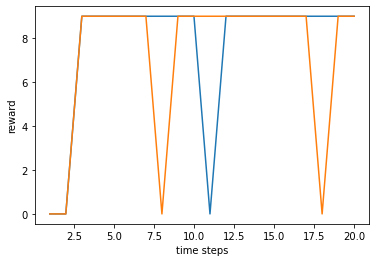

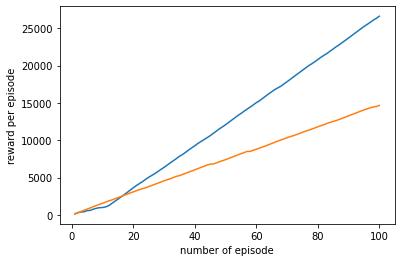

In [ ]:
q_table, y_q, y_q_time = Q_learning(0.1, 0.1)
print(q_table)
import matplotlib.pyplot as plt
# print(x)
# print("====")
# print(y)
x_q1 = [i for i in range(1, len(y_q_time) + 1)]
plt.plot(x_q1, y_q_time, x_s1, y_s_time)
plt.xlabel('time steps')
plt.ylabel('reward')
plt.show()

x_q2 = [i for i in range(1, len(y_q) + 1)]
plt.plot(x_q2, y_q, x_s2, y_s)
plt.xlabel('number of episode')
plt.ylabel('reward per episode')
plt.show()

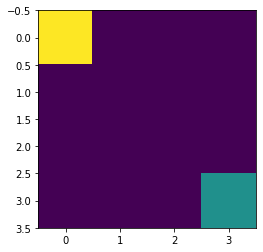

In [ ]:
env = GridEnvironment()
obs = env.reset()
env.render()

[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
right
0


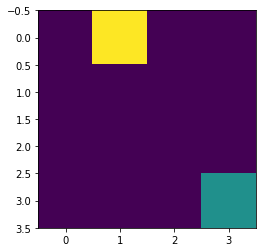

In [ ]:
action = 2
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
down
0


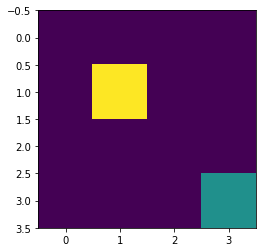

In [ ]:
action = 0
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

5
[0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
left
0


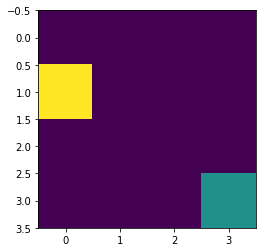

In [ ]:
action = 3
observation, actions, reward, done, info = env.step(action)
n = 0
for i in observation:
  n += 1
  if i == 1:
    print(n)
    break
  
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5]
down
0


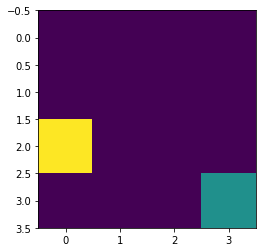

In [ ]:
action = 0
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5]
left
0


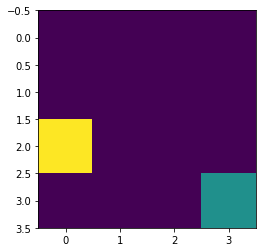

In [ ]:
action = 3
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.5]
down
9


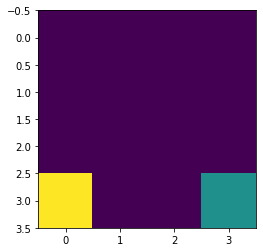

In [ ]:
action = 0
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.5]
right
0


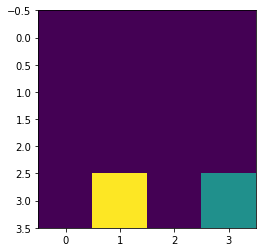

In [ ]:
action = 2
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5]
right
0


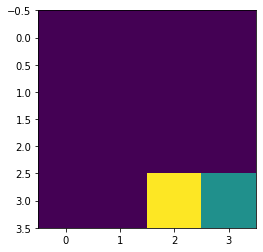

In [ ]:
action = 2
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.5]
up
0


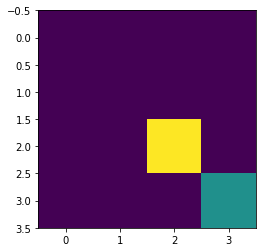

In [ ]:
action = 1
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.5]
right
10


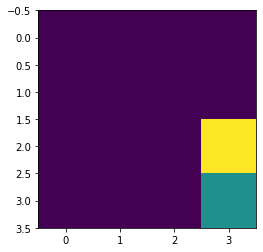

In [ ]:
action = 2
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
down
3


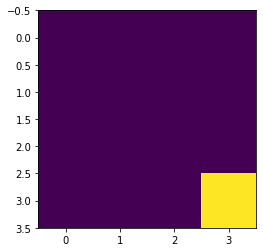

In [ ]:
action = 0
observation, actions, reward, done, info = env.step(action)
print(observation)
print(actions)
print(reward)
env.render()

In [ ]:
print('Reward:', reward)

Reward: 3


## Random Agent

In [ ]:
class RandomAgent:
    '''Random Agent class that contains the contains the information of the agent that takes action randomly'''
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, observation):
        return np.random.choice(self.action_space.n)

Action 2
Reward 0
Done False

Action 1
Reward 0
Done False

Action 2
Reward -7
Done False

Action 2
Reward 0
Done False

Action 2
Reward 0
Done False

Action 3
Reward -7
Done False

Action 3
Reward 0
Done False

Action 3
Reward 0
Done False

Action 1
Reward 0
Done False

Action 0
Reward 0
Done False

Action 0
Reward 0
Done False

Action 3
Reward 0
Done False

Action 3
Reward 0
Done False

Action 1
Reward 0
Done False

Action 0
Reward 0
Done False

Action 3
Reward 0
Done False

Action 1
Reward 0
Done False

Action 1
Reward 0
Done False

Action 1
Reward 0
Done False

Action 0
Reward 0
Done True



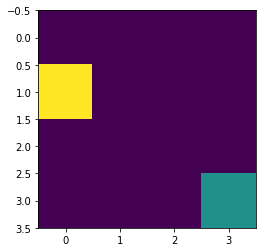

In [ ]:
# Random Agent
# Create Environment
env = GridEnvironment()

# Create random agent
agent = RandomAgent(env)
obs = env.reset()
done = False

# Repeat steps of Agent till Episode ends
# 0 - Right, 1 - Left, 2 - Up, 3 - Down
while not done:
    action = agent.step(obs)
    obs, actions, reward, done, info = env.step(action)
    
    print('Action', action)
    print('Reward', reward)
    print('Done', done)
    print()
    env.render()


0 -> Down <br>
1 -> Up <br>
2 -> Right <br>
3 -> Left